<a href="https://colab.research.google.com/github/yukti845/Neural-Networks/blob/main/Mega_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mega Case Study - Making a hybrid deep learning model

## Part-1 SOM

### Install MiniSom package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=c408e4566b96e6679bc0b0ab911b544efaa5a830936cc1ab212d8b0b636f66a2
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importing the Dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/som_dataset/Credit_Card_Applications.csv")
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

### Training the SOM

In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

## Visualizing the result

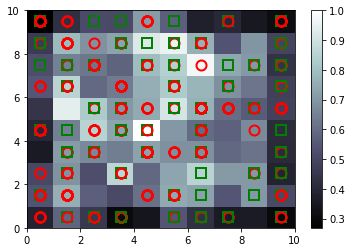

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the Frauds

In [11]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [12]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15668830
15585928
15583067
15623072
15592773
15691150
15807546
15773869
15796111
15809800
15750055
15748499
15732943
15770255
15773789
15794868
15705506
15812470
15788215
15722535
